### Plots

In [1]:
#--------------- Packages ---------------#
%load_ext autoreload
%autoreload 2
import emcee
import numpy as np
from classy import Class
import cluster_toolkit as ctk
import matplotlib.pyplot as plt
from colossus.cosmology import cosmology
from colossus.halo import concentration, profile_nfw, profile_composite
plt.style.use("~/Titus/Lensing/mass_calibration_of_DM_halos/CustomizingPlots")
%matplotlib inline

burnin = 1000

In [2]:
## True mass
mean_mass_true_arr = [1.971057e+14, 2.865907e+14, 4.064710e+14, 6.429285e+14] ##newdata, true_mass*h
l3_z0 = 1.971057e+14 
l4_z0 = 2.865907e+14
l5_z0 = 4.064710e+14
l6_z0 = 6.429285e+14

# Mini Uchuu: All radii
readerfile_l3_z0 = "newdata_sigboosts_fullrun_no_sys_in_model_phys_units_all_scale_0.2_30_final_final_Fig9_mcmc_results_l3_z0.h5"
readerfile_l4_z0 = "newdata_sigboosts_fullrun_no_sys_in_model_phys_units_all_scale_0.2_30_final_final_Fig9_mcmc_results_l4_z0.h5"
readerfile_l5_z0 = "newdata_sigboosts_fullrun_no_sys_in_model_phys_units_all_scale_0.2_30_final_final_Fig9_mcmc_results_l5_z0.h5"
readerfile_l6_z0 = "newdata_sigboosts_fullrun_no_sys_in_model_phys_units_all_scale_0.2_30_final_final_Fig9_mcmc_results_l6_z0.h5"

# ##################################################################################
# ##################################################################################
# # # # Mini Uchuu cylinder richness final: All radii final
# cyl_depth = '30'
# data_path = '/pscratch/sd/t/titus/data/'
# mass = np.load(data_path+f'mini_uchuu_mass_cylinder_richness_selection_d{cyl_depth}_no_pecvel_changing_vol_heidi_final2.npy', allow_pickle=True).item()
# l3_z0 = mass['l3_z0']
# l4_z0 = mass['l4_z0']
# l5_z0 = mass['l5_z0']
# l6_z0 = mass['l6_z0']

# # # # Mini Uchuu cylinder richness final: All radii final
# readerfile_l3_z0 = "cylinder_richness__mini_uchuu_cylinder_richness_phys_units_no_sys_all_scale_depth30_final_mcmc_results_l3_z0.h5"
# readerfile_l4_z0 = "cylinder_richness__mini_uchuu_cylinder_richness_phys_units_no_sys_all_scale_depth30_final_mcmc_results_l4_z0.h5"
# readerfile_l5_z0 = "cylinder_richness__mini_uchuu_cylinder_richness_phys_units_no_sys_all_scale_depth30_final_mcmc_results_l5_z0.h5"
# readerfile_l6_z0 = "cylinder_richness__mini_uchuu_cylinder_richness_phys_units_no_sys_all_scale_depth30_final_mcmc_results_l6_z0.h5"

In [3]:
filepath = "/pscratch/sd/t/titus/MiniUchuu/mcmc_results/"
def read_mcmc(readerfile, M_true, filepath = None, burnin = 100, param_type = "means"):
    if filepath is not None:
        reader = emcee.backends.HDFBackend(filepath+readerfile)
    else:
        reader = emcee.backends.HDFBackend(readerfile)
    samples = reader.get_chain()
    flat_samples = reader.get_chain(discard=burnin, flat=True)
    lnprob = reader.get_log_prob(discard=burnin, flat=True)
    uncertainty = np.std(flat_samples[:,0])
    h = 0.6774 
    if param_type == "bestfit":
        best_fit_params  = flat_samples[np.argmax(lnprob)] #best fit parameters
        M_obs = best_fit_params[0]
        C = (M_true)/(10**M_obs)
        return C, M_obs, uncertainty, best_fit_params
    elif param_type == "means":
        posterior_means = np.mean(flat_samples, axis=0) #posterior mean
        M_obs = posterior_means[0]
        C = (M_true)/(10**M_obs)
        return C, M_obs, uncertainty, posterior_means

param_type = "means"
# param_type = "bestfit"
C_l3_z0, aa, std_l3_z0, posterior_means_l3_z0 = read_mcmc(readerfile = readerfile_l3_z0, M_true = l3_z0, filepath = filepath, param_type = param_type)
C_l4_z0, bb, std_l4_z0, posterior_means_l4_z0 = read_mcmc(readerfile = readerfile_l4_z0, M_true = l4_z0, filepath = filepath, param_type = param_type)
C_l5_z0, cc, std_l5_z0, posterior_means_l5_z0 = read_mcmc(readerfile = readerfile_l5_z0, M_true = l5_z0, filepath = filepath, param_type = param_type)
C_l6_z0, dd, std_l6_z0, posterior_means_l6_z0 = read_mcmc(readerfile = readerfile_l6_z0, M_true = l6_z0, filepath = filepath, param_type = param_type)

C_z0 = np.array([C_l3_z0, C_l4_z0, C_l5_z0, C_l6_z0])
std_arr = np.array([std_l3_z0, std_l4_z0, std_l5_z0, std_l6_z0])
Mobs = np.array([aa, bb, cc, dd])

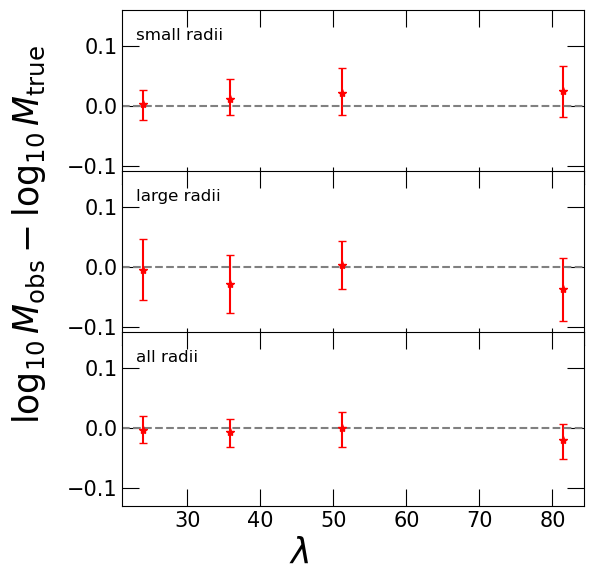

In [4]:
B1 = [23.99617, 35.86541, 51.21334, 81.45424]

bias_arrays = [np.load(filepath + "small_scale_bias_mini_uchuu.npy"), np.load(filepath + "large_scale_bias_mini_uchuu.npy"), np.load(filepath + "all_scale_bias_mini_uchuu.npy")]
ci_68_lower_arrays = [np.load(filepath + "small_scale_ci_68_lower_mini_uchuu.npy"), np.load(filepath + "large_scale_ci_68_lower_mini_uchuu.npy"), np.load(filepath + "all_scale_ci_68_lower_mini_uchuu.npy")]
ci_68_upper_arrays = [np.load(filepath + "small_scale_ci_68_upper_mini_uchuu.npy"), np.load(filepath + "large_scale_ci_68_upper_mini_uchuu.npy"), np.load(filepath + "all_scale_ci_68_upper_mini_uchuu.npy")]
radii_scale = ['small radii', 'large radii', 'all radii']

# Create a figure and four subplots (2 rows, 2 columns)
drop = 1
fig, axes = plt.subplots(3, 1, figsize=(6, 6), sharey=True, sharex = True)

for i in range(3):
    label = "data"

    ########################
    axes[i].set_ylim(-0.13, 0.16)
    axes[i].errorbar(B1, bias_arrays[i], yerr=[ci_68_lower_arrays[i], ci_68_upper_arrays[i]], fmt='*r', capsize=3)
    axes[i].text(23.0, 0.11, f"{radii_scale[i]}", fontsize = 12)
    axes[i].axhline(y=0, color='grey', linestyle='--')
        
# Add a super title, super x label, and super y label
fig.supxlabel(r'$\rm \mathit{\lambda}$', x = 0.5, y = 0.07, va='center', ha='center', fontsize=25)
fig.supylabel(r'$\rm \log_{10}\mathit{M}_{obs}-\log_{10}\mathit{M}_{true}$', x = 0.05, y = 0.6, va='center', ha='center', fontsize=25)

# Adjust spacing between subplots
plt.tight_layout(h_pad = -0.90, w_pad = -1.0)
plt.show()

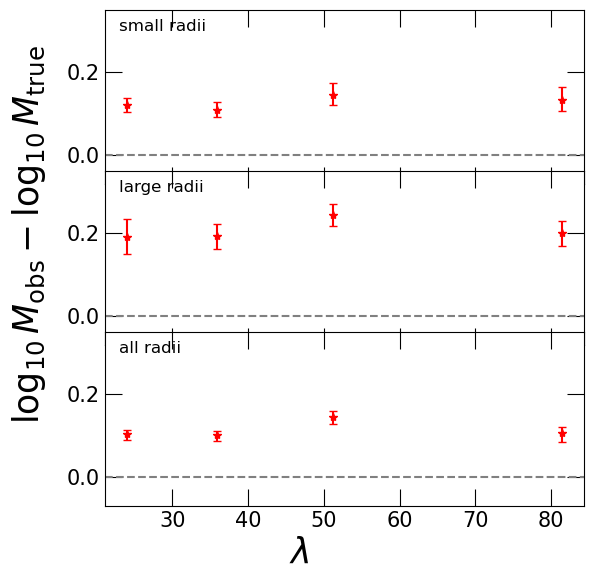

In [5]:
B1 = [23.99617, 35.86541, 51.21334, 81.45424]

bias_arrays = [np.load(filepath + "mini_uchuu_cyl_richness_small_scale_bias_no_sys_final.npy"), np.load(filepath + "mini_uchuu_cyl_richness_large_scale_bias_no_sys_final.npy"), np.load(filepath + "mini_uchuu_cyl_richness_all_scale_bias_no_sys_final.npy")]
ci_68_lower_arrays = [np.load(filepath + "mini_uchuu_cyl_richness_small_scale_ci_68_lower_no_sys_final.npy"), np.load(filepath + "mini_uchuu_cyl_richness_large_scale_ci_68_lower_no_sys_final.npy"), np.load(filepath + "mini_uchuu_cyl_richness_all_scale_ci_68_lower_no_sys_final.npy")]
ci_68_upper_arrays = [np.load(filepath + "mini_uchuu_cyl_richness_small_scale_ci_68_upper_no_sys_final.npy"), np.load(filepath + "mini_uchuu_cyl_richness_large_scale_ci_68_lower_no_sys_final.npy"), np.load(filepath + "mini_uchuu_cyl_richness_all_scale_ci_68_upper_no_sys_final.npy")]

radii_scale = ['small radii', 'large radii', 'all radii']

# Create a figure and four subplots (2 rows, 2 columns)
drop = 1
fig, axes = plt.subplots(3, 1, figsize=(6, 6), sharey=True, sharex = True)

for i in range(3):
    label = "data"

    ########################
    axes[i].set_ylim(-0.07, 0.35)
    axes[i].errorbar(B1, bias_arrays[i], yerr=[ci_68_lower_arrays[i], ci_68_upper_arrays[i]], fmt='*r', capsize=3)
    axes[i].text(23.0, 0.30, f"{radii_scale[i]}", fontsize = 12)
    axes[i].axhline(y=0, color='grey', linestyle='--')
        
# Add a super title, super x label, and super y label
fig.supxlabel(r'$\rm \mathit{\lambda}$', x = 0.5, y = 0.07, va='center', ha='center', fontsize=25)
fig.supylabel(r'$\rm \log_{10}\mathit{M}_{obs}-\log_{10}\mathit{M}_{true}$', x = 0.05, y = 0.6, va='center', ha='center', fontsize=25)

# Adjust spacing between subplots
plt.tight_layout(h_pad = -0.90, w_pad = -1.0)
plt.show()

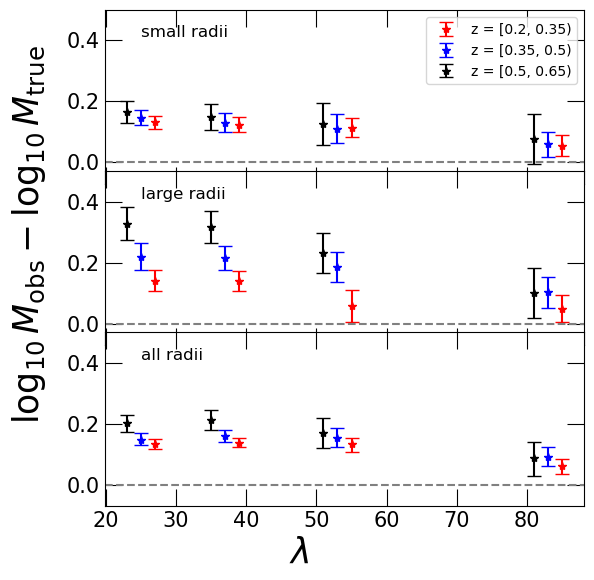

In [6]:
###############################
#################################
B1 = [27, 39, 55, 85]
B2 = [25, 37, 53, 83]
B3 = [23, 35, 51, 81]

cardinal_path = "/global/u2/t/titus/Titus/Lensing/codes/notebooks/cardinal/"
bias_arrays1 = [np.load(cardinal_path+"small_scale_bias_arr.npy"), np.load(cardinal_path+"large_scale_bias_arr.npy"), np.load(cardinal_path+"all_scale_bias_arr.npy")]
ci_68_lower_arrays = [np.load(cardinal_path+"small_scale_ci_68_lower_ls.npy"), np.load(cardinal_path+"large_scale_ci_68_lower_ls.npy"), np.load(cardinal_path+"all_scale_ci_68_lower_ls.npy")]
ci_68_upper_arrays = [np.load(cardinal_path+"small_scale_ci_68_upper.npy"), np.load(cardinal_path+"large_scale_ci_68_upper.npy"), np.load(cardinal_path+"all_scale_ci_68_upper.npy")]
radii_scale = ['small radii', 'large radii', 'all radii']

# Create a figure and four subplots (2 rows, 2 columns)
drop = 1
fig, axes = plt.subplots(3, 1, figsize=(6, 6), sharey=True, sharex = True) 

for i in range(3):
    label = "data"

    ########################
    axes[i].set_ylim(-0.07, 0.5)
    axes[i].errorbar(B1, bias_arrays1[i][0:4], yerr=[ci_68_lower_arrays[i][0:4], ci_68_upper_arrays[i][0:4]], fmt='*r', label="z = [0.2, 0.35)", capsize=5)
    axes[i].errorbar(B2, bias_arrays1[i][4:8], yerr=[ci_68_lower_arrays[i][4:8], ci_68_upper_arrays[i][4:8]], fmt='*b', label="z = [0.35, 0.5)", capsize=5)
    axes[i].errorbar(B3, bias_arrays1[i][8:], yerr=[ci_68_lower_arrays[i][8:], ci_68_upper_arrays[i][8:]], fmt='*k', label="z = [0.5, 0.65)", capsize=5)
    axes[i].text(25.0, 0.410, f"{radii_scale[i]}", fontsize = 12)
    axes[i].axhline(y=0, color='grey', linestyle='--')
    if i == 0:
        axes[i].legend(fontsize=10)
        
# Add a super title, super x label, and super y label
fig.supxlabel(r'$\rm \mathit{\lambda}$', x = 0.5, y = 0.07, va='center', ha='center', fontsize=25)
fig.supylabel(r'$\rm \log_{10}\mathit{M}_{obs}-\log_{10}\mathit{M}_{true}$', x = 0.05, y = 0.6, va='center', ha='center', fontsize=25)

# Adjust spacing between subplots
plt.tight_layout(h_pad = -0.90, w_pad = -1.0)
plt.show()

## Varying concentration

In [7]:
# Set colossus cosmology
cosmo_params = {'flat': True, 'H0': 67.74, 'Om0': 0.3089, 'Ob0': 0.0486, 'sigma8': 0.8159, 'ns': 0.9667}
cosmology.addCosmology('MiniUchuu', cosmo_params)
cosmo = cosmology.setCosmology('MiniUchuu')
h = cosmo_params['H0']/100

#Start by specifying the cosmology
Omega_b = cosmo_params['Ob0']
Omega_m = cosmo_params['Om0']
Omega_cdm = Omega_m - Omega_b
sigma8 = cosmo_params['sigma8']
h = cosmo_params['H0']/100 # McClintock h value
A_s = 2.1e-9 
n_s = cosmo_params['ns']

#Create a params dictionary
#Need to specify the max wavenumber
k_max = 1000 #UNITS: 1/Mpc

params = {
         'output':'mPk',
         'h':h,
         'sigma8':sigma8,
         'n_s':n_s,
         'Omega_b':Omega_b,
         'Omega_cdm':Omega_cdm,
         'P_k_max_1/Mpc':k_max,
         'z_max_pk':1.0, #Default value is 10
         'non linear':'halofit'
}

#Initialize the cosmology and compute everything
cosmo_ctk = Class()
cosmo_ctk.set(params)
cosmo_ctk.compute()

In [8]:
def model_with_no_sys(M, con):
    c = con
    Rproj = np.logspace(-2, 2.4, num=1000, base=10) #Mpc/h Projected 2D radii. 
    R3d = np.logspace(-2, 3, num=1000, base=10) #Mpc/h comoving. 3D radii.

    # rp in comoving Mpc/h
    Rmin = 0.0323 
    Rmax = 30 
    nbins = 15

    Redges = np.logspace(np.log10(Rmin), np.log10(Rmax), nbins+1) #Projected radial bin edges
    Redges *= h*(1+z) #Converted to Mpc/h comoving

    #Specify k and z
    # k = np.logspace(-5, 3, num=4000) #Mpc^-1 comoving
    k = np.logspace(-5, np.log10(k_max), num=4000) #Mpc^-1 comoving
    # Power spectrum
    Pnonlin = np.array([cosmo_ctk.pk(ki, z) for ki in k])#*h**3  #Mpc^3/h^3 comoving
    Plin = np.array([cosmo_ctk.pk_lin(ki, z) for ki in k])#*h**3  #Mpc^3/h^3 comoving
    kh = k/h #h/Mpc comoving

    #P(k) are in Mpc^3/h^3 comoving
    #Thus, you will need to convert these to h/Mpc and (Mpc/h)^3 to use in the toolkit.
    Plin *= h**3
    Pnonlin *= h**3

    # NFW profile
    xi_nfw = ctk.xi.xi_nfw_at_r(R3d, M, c, Omega_m)

    # Matter-matter correlation function (matter auto-correlation)
    xi_mm = ctk.xi.xi_mm_at_r(R3d, kh, Pnonlin)

     # 2-halo correlation function
    bias_term = ctk.bias.bias_at_M(M, kh, Plin, Omega_m) # Here, P must be linear.
    xi_2halo = ctk.xi.xi_2halo(bias_term, xi_mm)

    # Halo-matter correlation function
    xi_hm = ctk.xi.xi_hm(xi_nfw, xi_2halo)

    # Sigma (computed from xi_hm)
    Sigma = ctk.deltasigma.Sigma_at_R(Rproj, R3d, xi_hm, M, c, Omega_m) #Sigma

    # DeltaSigma (excess surface density)
    DS_theory = ctk.deltasigma.DeltaSigma_at_R(Rproj, Rproj, Sigma, M, c, Omega_m) #DeltaSigma
    # print(DS_theory)
    ave_DS = ctk.averaging.average_profile_in_bins(Redges, Rproj, DS_theory)
    ave_DS *= h*(1+z)**2 #convert to Msun/pc^2 physical
    return ave_DS

M 14.294699183603406 c 5.783799525109833
M_posterior 14.293484386825478 c_posterior 3.920424451254188
M 14.457262093234341 c 5.639005045384515
M_posterior 14.449050052393892 c_posterior 3.709078451884783
M 14.609029565946697 c 5.502417677473138
M_posterior 14.613792529632201 c_posterior 3.5582420964476262
M 14.808162677773305 c 5.321248565355364
M_posterior 14.78484882658819 c_posterior 3.77136126393387


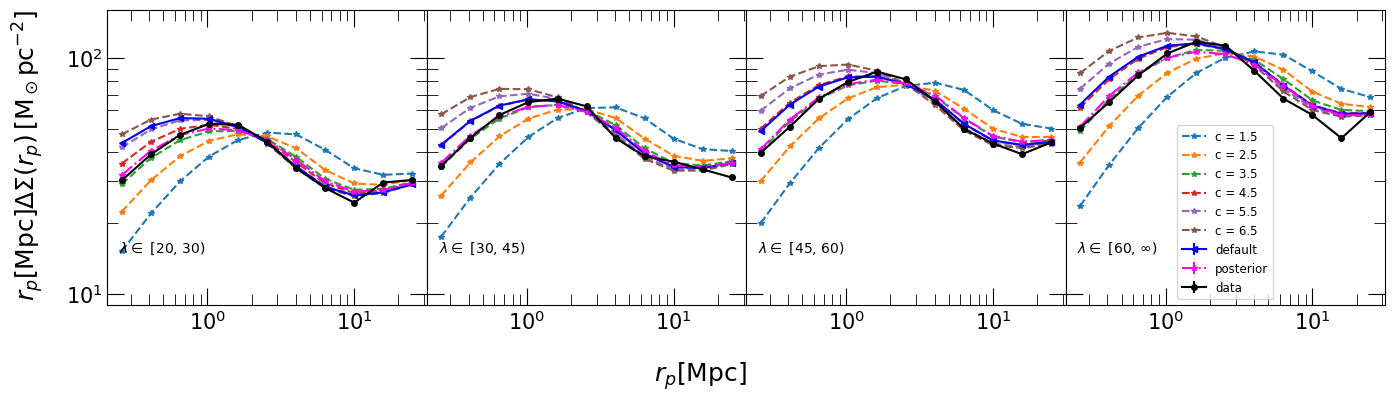

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from cluster_toolkit import miscentering
%matplotlib inline

fig, axes = plt.subplots(1, 4, figsize=(14, 4), sharey=True, sharex = True)

nbody_loc = '/global/u2/t/titus/Titus/Lensing/data/'
ds_data = np.load(nbody_loc+"saved_mini_uchuu_profiles_newdata_dic_mh_phys_units_final22.npy", allow_pickle=True).item()
ds_models = np.load(nbody_loc+"saved_mini_uchuu_profiles_no_sys_model_phys_units_final2.npy", allow_pickle=True).item()
load_ds_profiles = np.load(nbody_loc+"saved_mini_uchuu_profiles_newdata_dic_mh_phys_units_final2.npy", allow_pickle=True).item()
posterior_means_dic = {"l3_z0":posterior_means_l3_z0, "l4_z0":posterior_means_l4_z0, 
                       "l5_z0":posterior_means_l5_z0, "l6_z0":posterior_means_l6_z0
                      }
lambda_range = ["[20, 30)", "[30, 45)", "[45, 60)", "[60, ∞)"]
lambdas = [23.99617, 35.86541, 51.21334, 81.45424]  # Example lambda values, adjust as necessary
z = 0.3

##newdata, true_mass*h
mean_mass_true_arr = {"l3_z0":1.971057e+14, "l4_z0":2.865907e+14, "l5_z0":4.064710e+14, "l6_z0":6.429285e+14} ##newdata, true_mass*h
con = [1.5, 2.5, 3.5, 4.5, 5.5, 6.5]
col = ["blue", "green", "magenta", "cyan", "violet", "purple"]

rp = np.array([0.04221139,  0.06651455,  0.10516441,  0.16537565,  0.26069825, 
               0.41202975,  0.65045543,  1.02563815,  1.61857299,  2.55379112, 
               4.02731114,  6.34991963, 10.00980414, 15.784786  , 24.87216972])


for j, lam in enumerate(lambdas):
    lam_z_bin = "l"+str(j+3)+"_z0"
    
    ds_posterior = load_ds_profiles[lam_z_bin]
    ds = ds_data[lam_z_bin]
    ds_models0 = ds_models[lam_z_bin]
    
    M = mean_mass_true_arr[lam_z_bin]
    a = 1/(1+z) # scale factor
    c0 = concentration.concentration(M=M, mdef='200m', z=z, model = 'bhattacharya13') # 'bhattacharya13', 'bullock01'
    print("M", np.log10(M), "c", c0)
    
    log10_M, c_posterior = posterior_means_dic[lam_z_bin]
    print("M_posterior", log10_M, "c_posterior", c_posterior)
    ave_DS_posterior = model_with_no_sys(10**log10_M, c_posterior)
    
    for k in range(len(con)):
        ave_DS = model_with_no_sys(M, con[k])
        
        # All scale
        inds1 = (rp >= 0.2)*(rp < 999) 
        rp1 = rp[inds1]

        # label = ["data w/o systematics", "model w/o systematics"]
        label = ["data", "posterior model"]
        axes[j].loglog()

        ########################
        axes[j].set_ylim(9.0, 1.6e2)

        axes[j].plot(rp1, rp1*ave_DS[inds1], "--", marker='*', ms = 4.0, label = f"c = {con[k]}")#, color = color)
    axes[j].errorbar(rp1, rp1*ds_models0[inds1], yerr = np.zeros(len(rp1)), 
                     fmt = '-<', ms = 4.0, color = 'blue', label = "default") #:*, -.*, --*, -*
    axes[j].errorbar(rp1, rp1*ave_DS_posterior[inds1], yerr = np.zeros(len(rp1)), 
                     fmt = '-.*', ms = 4.0, color = 'magenta', label = "posterior") #:*, -.*, --*, -*
    axes[j].errorbar(rp1, rp1*ds[inds1], yerr = np.zeros(len(rp1)), fmt = '-o', 
                     ms = 4.0, color = 'black', label = label[0])
    axes[j].text(0.250, 15.0, f"$\lambda \in$ {lambda_range[j]}", fontsize = 10)
    if j == 3:
        axes[j].legend(fontsize=8.5)

# Add a super title, super x label, and super y label
# fig.suptitle(r'$\Delta\Sigma$ Profiles', fontsize=20)
fig.supxlabel(r"$\rm \mathit{r_p} [Mpc]$", fontsize=18)
fig.supylabel(r"$\rm \mathit{r_p} [Mpc] \Delta\Sigma(\mathit{r_p})\,[M_\odot \mathrm{pc}^{-2}]$", x = 0.02, y = 0.6, va='center', ha='center', fontsize=18)

# Adjust spacing between subplots
plt.tight_layout(h_pad = -1.0, w_pad = 0.0)
plt.show()